<a href="https://colab.research.google.com/github/codelspak/Struggles/blob/main/WK28_case1_Kaggle_ML_Classification_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 설명
[Kaggle 노트북 출처](https://www.kaggle.com/code/shilongzhuang/space-titanic-a-beginner-guide-80-24-accuracy)

참고 : Data Science workflow <br>
```
1. 데이터 이해 (EDA 및 시각화 > 데이터 자체와 피쳐 간 관계 확인)
2. 상관관계 분석 (-> Feature selection)
3, 데이터 정제 (missing/null values 보완)
4. 파생변수 생성 (Feature engineering을 통해 소음을 줄여나감)
5. 데이터 전처리 (Data preprocessing > encoding, transformation(log, sqrt 등) 등, 모델링에 적절한 형태로 다듬어줌)
6. 모델 학습
7. 하이퍼파라미터 튜닝(configure > 알고리즘 최적화)
8. 앙상블 기법 활용 (여러 알고리즘을 combine - 장점 강화, 약점 보완)
```

# 1. 라이브러리 및 데이터 불러오기

In [ ]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 데이터 분석
import pandas as pd
import numpy as np
# 분석 시각화
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# breathtaking visuals (?)
import mplcyberpunk

In [ ]:
# cyberpunk 스타일 불러오기
plt.style.use('cyberpunk')

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/spaceship-titanic/train.csv")
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/spaceship-titanic/test.csv')
df_submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/spaceship-titanic/sample_submission.csv')
df_train.shape, df_test.shape, df_submit.shape

((8693, 14), (4277, 13), (4277, 2))

In [ ]:
df_test_copy = df_test.copy()
df = [df_train, df_test]

# 2. 데이터 기초정보 확인 (info/기술통계/결측치)

In [ ]:
# column명 소문자화
_ = [column_name.lower() for column_name in df_train.columns.tolist()]

df_train.columns = _
df_train.head(10)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
_ = [column_name.lower() for column_name in df_test.columns.tolist()]
df_test.columns = _

df_test.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   4277 non-null   object 
 1   homeplanet    4190 non-null   object 
 2   cryosleep     4184 non-null   object 
 3   cabin         4177 non-null   object 
 4   destination   4185 non-null   object 
 5   age           4186 non-null   float64
 6   vip           4184 non-null   object 
 7   roomservice   4195 non-null   float64
 8   foodcourt     4171 non-null   float64
 9   shoppingmall  4179 non-null   float64
 10  spa           4176 non-null   float64
 11  vrdeck        4197 non-null   float64
 12  name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


Info 정보를 통해 다음과 같이 데이터를 분류할 수 있음.
```
1. Featurs
    - 수치형: Age / RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
    - 범주형: HomePlanet, Destination / CryoSleep, VIP
    - Mixed/Alphanumeric: Cabin, Name
2. Target 
    - 범주형: Transported
```

In [ ]:
# 위 내용을 기준으로 각 유형 별 column list를 만들어주자
list_num_col = ['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 'transported']
list_cat_col = ['homeplanet', 'destination', 'cryosleep', 'vip']
list_mixed_col = ['cabin', 'name']

In [ ]:
df_train.describe()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# missing_value 비율 계산해주는 함수 생성
def missing_values(df):
    missing_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_percent = pd.DataFrame(missing_percent).round(2)
    df_missing_percent = df_missing_percent.reset_index().rename(
        columns = {
            'index':'Features',
            0 : 'Missing Percentage(%)'
        }
    )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
        columns = {
            'index':'Features',
            0 : 'Missing Values'
        }
    )

    final = df_missing_value.merge(df_missing_percent, how='inner', left_on = 'Features', right_on = 'Features')
    final = final.sort_values(by = 'Missing Percentage(%)', ascending = False)

    return final

missing_values(df_train)

,Features,Missing Values,Missing Percentage(%)
2,cryosleep,217,2.50
9,shoppingmall,208,2.39
6,vip,203,2.34
1,homeplanet,201,2.31
12,name,200,2.30
3,cabin,199,2.29
11,vrdeck,188,2.16
8,foodcourt,183,2.11
10,spa,183,2.11
4,destination,182,2.09


In [ ]:
missing_values(df_test)

,Features,Missing Values,Missing Percentage(%)
8,foodcourt,106,2.48
10,spa,101,2.36
3,cabin,100,2.34
9,shoppingmall,98,2.29
12,name,94,2.20
2,cryosleep,93,2.17
6,vip,93,2.17
4,destination,92,2.15
5,age,91,2.13
1,homeplanet,87,2.03


위를 통해 각 피처의 결측치 비율이 0~2.5% 사이의, 매우 적은 값이라는 걸 알 수 있음

# 3. 가설 설정
```
1.Cabin vs Cryosleep. 
    - cryosleep 장비가 특정 구역에 위치해있다
2. PassengerId group (gggg=group, pp=number) vs HomePlanet/Destination
    - 같은 여행 그룹은 춮발지/행선지가 같다
3. CryoSleep vs Services
    - cryosleep을 선택한 승객들은 (어메니티) 추가 지출이 적다
4. CryoSleep vs PassengerId group
    - 혼자 여행하는 사람들이 cryosleep을 더 많이 이용한다
5. VIP vs Services
    - VIP와 일반 승객들의 어메니티 지출 비용에는 차이가 있다
```

# 4. 탐색적 데이터 분석(EDA) 

In [ ]:
df_num = df_train[list_num_col]
df_cat = df_train[list_cat_col]

In [ ]:
df_train.head(3)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


#### 1) 수치형 변수

###### patterns in features

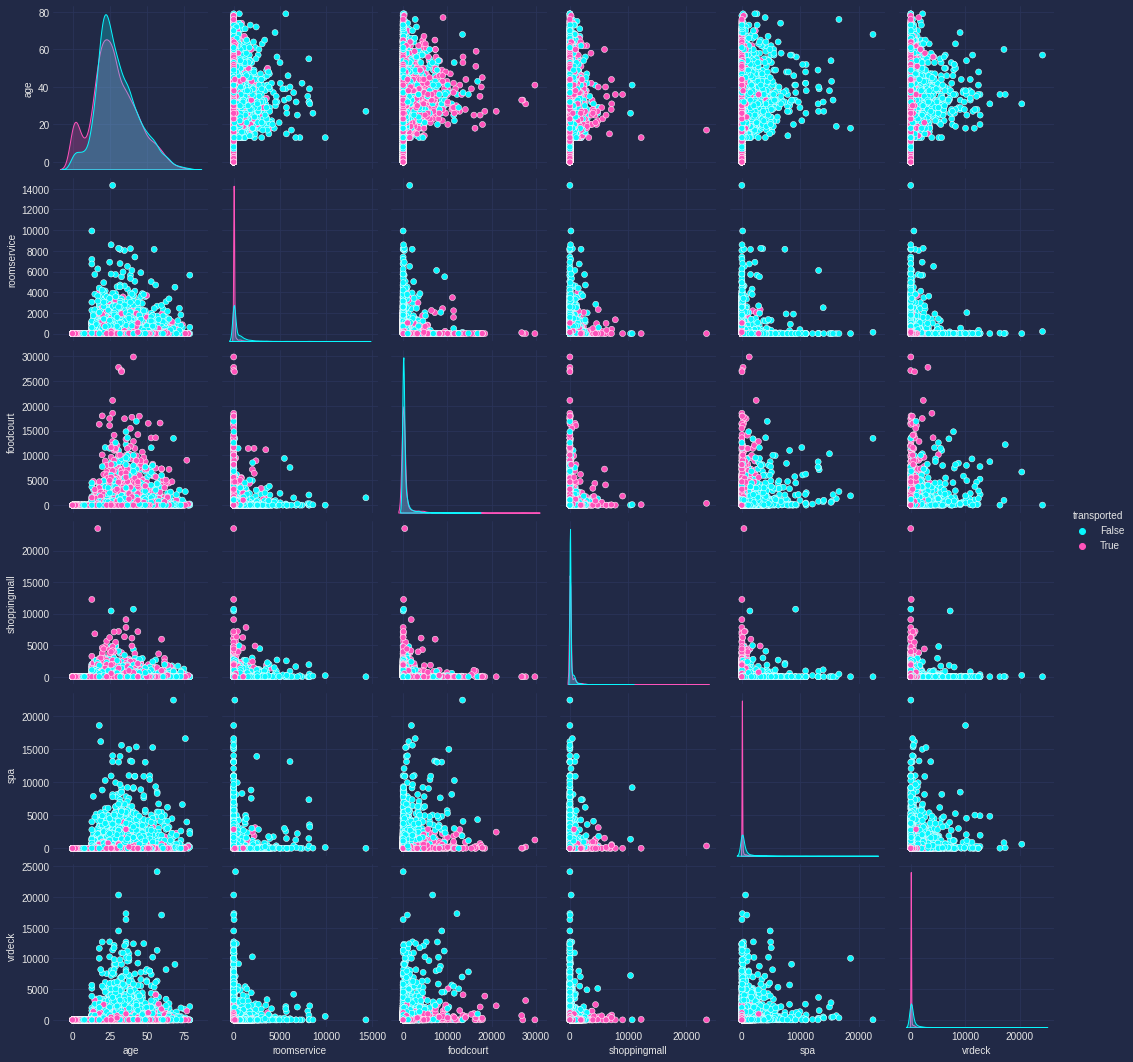

In [ ]:
_ = sns.pairplot(df_num, hue = 'transported')

[Text(0, 0.5, ''), Text(0.5, 0, '')]

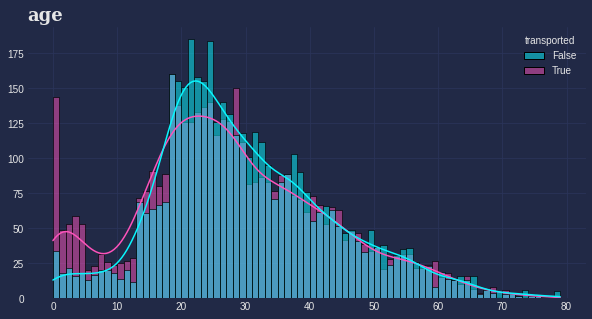

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.histplot(data = df_train, x = 'age', hue = 'transported', binwidth = 1, kde = True)
plt.title('age', 
          fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
          loc = 'left')
ax.set(xlabel = None, ylabel = None)

위 그래프들을 통해 다음의 사실을 발견할 수 있음<br>
1. 0~18세 : 다른 나이대에 비해 transported된 승객 수가 많음<br>
2. 21~28세 : 다른 나이대와 달리 transported된 승객 수가 더 적음<br>
3. Age data : 대체로 정규분포에 비슷한 형태를 보이지만, 왼쪽으로 약간 치우침<br>

이 과정에서 내린 결론은 다음과 같음.
```
1. Age는 중요한 feature로 보임 - 결측치를 채워주자
2. data transformation을 통해 정규분포에 더 가까운 형태로 바꿔주자
```

In [ ]:
# 어메니티 관련 수치형 변수 5개 
def strip_plot(df, x_col_name, y_col_name):
    ax = sns.stripplot(x = df[x_col_name], y = df[y_col_name])
    plt.title(str(y_col_name),
              fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
              loc = 'left')
    ax.set(xlabel = None, ylabel = None)


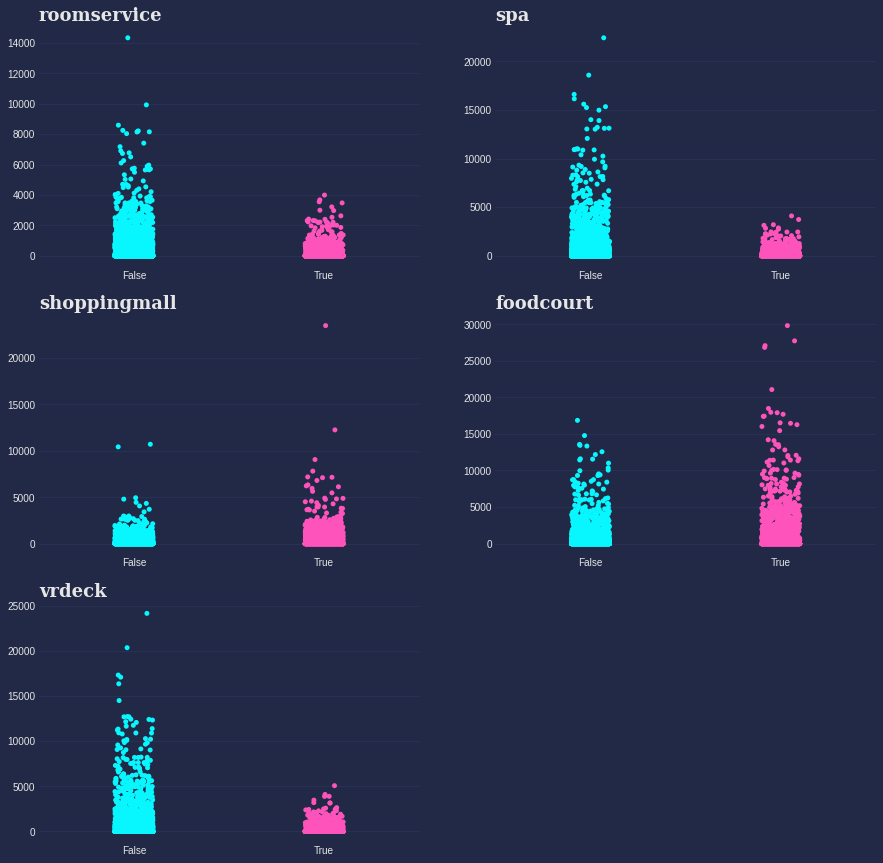

In [ ]:
fig = plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
strip_plot(df_train, 'transported', 'roomservice')

plt.subplot(3,2,3)
strip_plot(df_train, 'transported', 'shoppingmall')

plt.subplot(3,2,4)
strip_plot(df_train, 'transported', 'foodcourt')

plt.subplot(3,2,2)
strip_plot(df_train, 'transported', 'spa')

plt.subplot(3,2,5)
strip_plot(df_train, 'transported', 'vrdeck')

plt.show()

위 그래프들을 통해 다음의 사실을 발견할 수 있음

1. RoomService, Spa, VRDeck : 유사한 분포를 가짐 - 해당 어메니티에 높은 비용을 지출한 승객들은 transport되지 않음
2. ShoppingMall, FoodCourt : 유사한 분포를 가짐 - 해당 어메니티에 높은 비용을 지출한 승객들은 transport된 경향이 있음

```
이 과정에서 내린 결론은 다음과 같음.
파생변수 생성 (to be less likely to be transported : False)
1. premium = sum of bills of (RoomService, Spa, VRDeck)
2. basic = sum of bills of (ShoppingMall, FoodCourt)
```

참고. subplot vs subplots<br>
plt.subplot # add a subplot to the current figure<br>
plt.subplots # create a figure and a set of subplots

###### correlation between features
feature engineering의 baseline으로 쓸 것임

In [ ]:
# sns.heatmap?
# Plot rectangular data as a color-encoded matrix.
# there are a lot of parameters good to remember
# vmin, vmax
# square : bool - if True : set the axes aspect to 'equal' so each cell will be square-shaped
# xticklabels yticklabels
# mask
# ax - axes in which to draw the plot, otherwise use the currently active axes

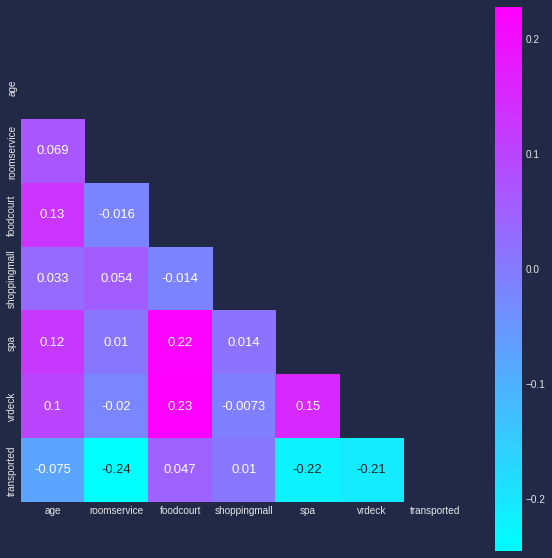

In [ ]:
plt.subplots(figsize = (10,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask = mask, cmap = 'cool',  annot = True, annot_kws = {'fontsize':13}, square = True)

위 상관관계 시각화를 통해 다음의 두 가지를 알 수 있음.
1. Age : 정규분포 형태를 띄고 있음에도, 놀라울 만큼 Transported와 관계가 없다
2. 현재의 feature 중에서는 RoomService, Spa, VRDeck이 Transported와 그나마 높은 상관관계를 갖는 걸로 보임

```
결론 
1. Age를 구간으로 나눈 범주형 변수를 생성하자
```

###### 파생변수 생성
위에서 관찰 후 내린 결론에 따라, premium/basic/ageband 세 개 변수를 생성해보자

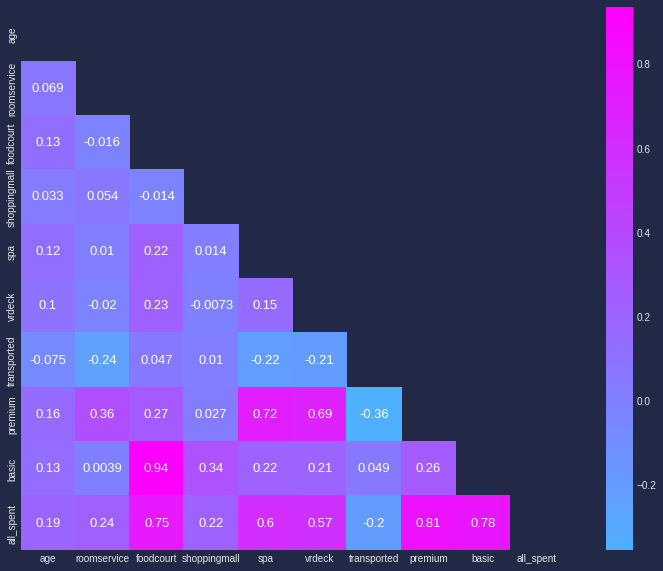

In [ ]:
# 어메니티 관련 features - premium / basic and all_spent

# df = [df_train, df_test]
for dataset in df : 
    dataset['premium'] = dataset['roomservice'] + dataset['spa'] + dataset['vrdeck']
    dataset['basic'] = dataset['foodcourt'] + dataset['shoppingmall'] 
    dataset['all_spent'] = dataset['premium'] + dataset['basic'] 

# 수치형 변수 column list에 파생변수 추가
list_num_col.extend(['premium' ,'basic', 'all_spent'])
# 수치형 변수 dataframe
df_num = df_train[list_num_col]

# 시각화
plt.subplots(figsize = (15,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask = mask, cmap = 'cool', annot = True, annot_kws = {'fontsize':13}, center = 0, square = True)



```
결론
1. 생성한 파생변수 중 premium - Transported와의 상관계수가 -0.36으로 괜찮음. 
    - 파생변수 유지
    - premium feature와 multicolinear한 피처는 제거해줌
2. 분포가 심하게 편향된 피처는 normalize해줌
    - 단, 만약 해당 transformation이 상관관계를 개선해준다면!
```

###### 결측치 처리 방향 설정 (imputation) - RS/FC/SM/Spa/VRD 및 Age
당연히 결측치를 채우는 방법에는 여러가지가 있음<br>
1. 가장 간단한 건 **central tendancy**를 이용하는 것 
    - mean, median, mode 등
2. 더 좋은 건 **EDA에서 얻은 insight에 근거, 각 feature 특성에 맞게 채워주는 것**

In [ ]:
# 앞에서 해준 것처럼, 여러 변수 간 관계를 시각화하는 데서 발생할 수 있는, 불필요한 반복을 줄이기 위해 시각화 함수를 정의해줌
def scatter(df, x_col_name, y_col_name, hue_col_name):
    ax = sns.scatterplot(x = df[x_col_name], y = df[y_col_name], hue = df[hue_col_name])
    plt.title(str(y_col_name),
              fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
              loc = 'left')
    ax.set(xlabel = None, ylabel = None)

In [ ]:
def box(df, x_col_name, y_col_name):
    ax = sns.boxplot(x = df[x_col_name], y = df[y_col_name], width = 0.3)
    plt.title(str(y_col_name) + ' by ' + str(x_col_name),
              fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
              loc = 'left')
    ax.set(xlabel = None, ylabel = None)

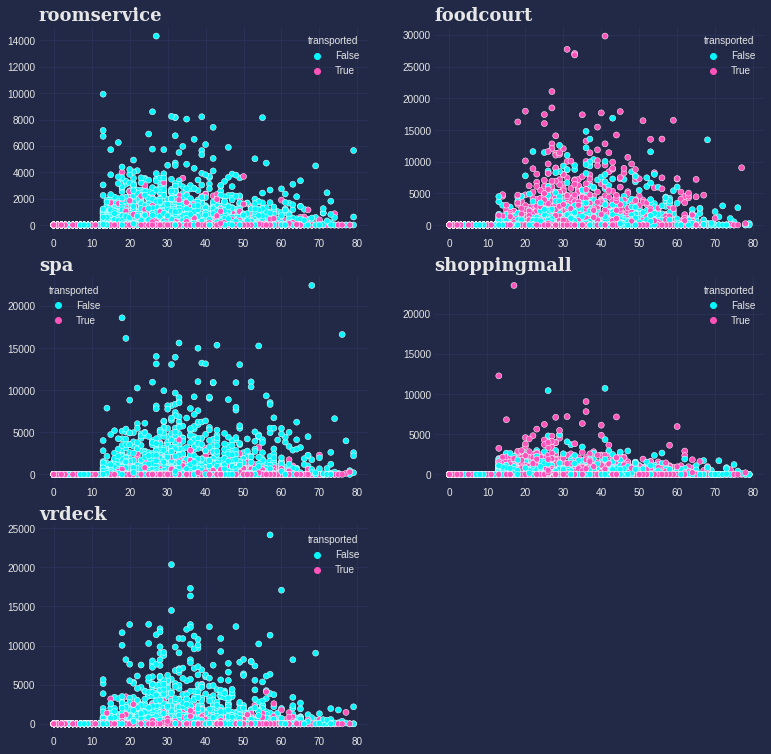

In [ ]:
# 수치형 변수 간 - 산점도
fig = plt.figure(figsize = (13,13))

plt.subplot(3,2,1)
scatter(df_train, 'age', 'roomservice', 'transported')

plt.subplot(3,2,2)
scatter(df_train, 'age', 'foodcourt', 'transported')

plt.subplot(3,2,3)
scatter(df_train, 'age', 'spa', 'transported')

plt.subplot(3,2,4)
scatter(df_train, 'age', 'shoppingmall', 'transported')

plt.subplot(3,2,5)
scatter(df_train, 'age', 'vrdeck', 'transported')

In [ ]:
# 범주형 변수 분포
# def strip_plot(df, x_col_name, y_col_name):
#     ax = sns.stripplot(x = df[x_col_name], y = df[y_col_name])
#     plt.title(str(y_col_name),
#               fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
#               loc = 'left')
#     ax.set(xlabel = None, ylabel = None)

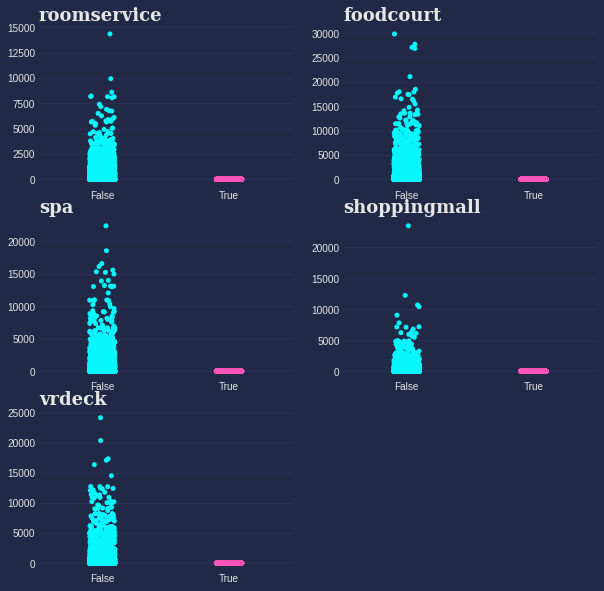

In [ ]:
# 어메니티 비용 - CryoSleep
fig = plt.figure(figsize=(10,10))

plt.subplot(3, 2, 1)
strip_plot(df_train, 'cryosleep', 'roomservice')

plt.subplot(3, 2, 2)
strip_plot(df_train, 'cryosleep', 'foodcourt')

plt.subplot(3, 2, 3)
strip_plot(df_train, 'cryosleep', 'spa')

plt.subplot(3, 2, 4)
strip_plot(df_train, 'cryosleep', 'shoppingmall')

plt.subplot(3, 2, 5)
strip_plot(df_train, 'cryosleep', 'vrdeck')

```
Insight
1. CryoSleep 이용 승객들 : 기타 어메니티 거의 이용하지 않음

따라서 Age, CryoSleep 두 항목을 기준으로 어메니티 비용 5종을 채워주겠음
```

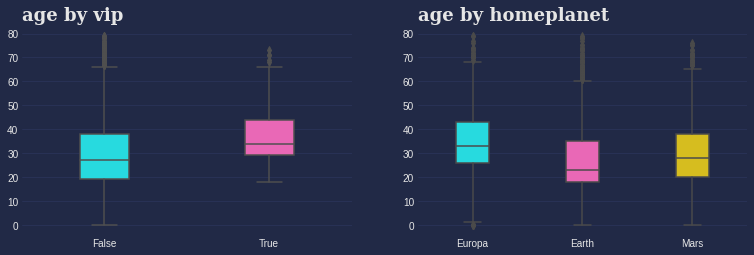

In [ ]:
# 수치형 / 범주형 변수 간 - boxplot
fig = plt.figure(figsize = (13,13))

plt.subplot(3,2,1)
box(df_train, 'vip', 'age')

plt.subplot(3,2,2)
box(df_train, 'homeplanet', 'age')


```
Insight
1. 수치형 변수 (나이 - 비용) 간 산점도 
    - 대부분의 어메니티에서 10세 이하 아이들 지불 비용 == 0 : 구매 능력이 없음
2. 수치형 / 범주형 변수 간 (나이 / VIP or HomePlanet) 데이터 분포 boxplot
    - VIP와 일반 승객 사이, 분포 차이가 존재 (iqr, 중앙값, 1/3사분위값 모두)
        : 아마도 VIP 가입 조건에 '나이' 항목이 있지 않을까 예상
    - HomePlanet 종류에 따라서도, 나이 분포에 차이가 존재 

따라서 VIP, HomePlanet 두 항목을 기준으로 Age를 채워주겠음
```

###### 관련 파생변수 생성 및 결측치 처리

In [ ]:
# 나이 관련 - is_child 생성
for dataset in df :
    dataset['is_child'] = 0
    dataset.loc[dataset.age<=12, 'is_child'] = 1
    dataset.loc[dataset.age>12, 'is_child'] = 0

services = ['roomservice', 'shoppingmall', 'spa', 'foodcourt', 'vrdeck']

for s in services :
    print(df_train.groupby(['is_child', 'cryosleep'])[s].median().fillna(0))
    print('-'*50)


is_child  cryosleep
0         False        9.0
          True         0.0
1         False        0.0
          True         0.0
Name: roomservice, dtype: float64
--------------------------------------------------
is_child  cryosleep
0         False        6.0
          True         0.0
1         False        0.0
          True         0.0
Name: shoppingmall, dtype: float64
--------------------------------------------------
is_child  cryosleep
0         False        16.0
          True          0.0
1         False         0.0
          True          0.0
Name: spa, dtype: float64
--------------------------------------------------
is_child  cryosleep
0         False        15.0
          True          0.0
1         False         0.0
          True          0.0
Name: foodcourt, dtype: float64
--------------------------------------------------
is_child  cryosleep
0         False        10.0
          True          0.0
1         False         0.0
          True          0.0
Name: vrdeck, dty

In [ ]:
# 참고1. 일반적인 groupby 형태
df_train.groupby(['is_child', 'cryosleep'])['spa'].mean()

is_child  cryosleep
0         False        525.884826
          True           0.000000
1         False          0.000000
          True           0.000000
Name: spa, dtype: float64

In [ ]:
# 참고2. T method를 써 보았지만, Series여서 그런지 변화가 없음
df_train.groupby(['is_child', 'cryosleep'])['spa'].mean().T

is_child  cryosleep
0         False        525.884826
          True           0.000000
1         False          0.000000
          True           0.000000
Name: spa, dtype: float64

In [ ]:
# 참고3. 이 때, groupby object에 집계함수 대신 transform('func_name')을 써주면, 보이는 것처럼 로데이터 형태에 집계 결과값을 넣어준 귀여운 결과물이 반환됨!
df_train.groupby(['is_child', 'cryosleep'])['spa'].transform('mean')

0       525.884826
1       525.884826
2       525.884826
3       525.884826
4       525.884826
           ...    
8688    525.884826
8689      0.000000
8690    525.884826
8691    525.884826
8692    525.884826
Name: spa, Length: 8693, dtype: float64

In [ ]:
# 위 피쳐들의 central tendancy 기준으로, 어메니티 서비스 비용 채워줌
for dataset in df :
    dataset['roomservice'] = dataset['roomservice'].fillna( dataset.groupby(['is_child', 'cryosleep'])['roomservice'].transform('median') )
    dataset['foodcourt'] = dataset['foodcourt'].fillna( dataset.groupby(['is_child', 'cryosleep'])['foodcourt'].transform('median') )
    dataset['spa'] = dataset['spa'].fillna( dataset.groupby(['is_child', 'cryosleep'])['spa'].transform('median') )
    dataset['vrdeck'] = dataset['vrdeck'].fillna( dataset.groupby(['is_child', 'cryosleep'])['vrdeck'].transform('median') )
    dataset['shoppingmall'] = dataset['shoppingmall'].fillna( dataset.groupby(['is_child', 'cryosleep'])['shoppingmall'].transform('median') )

In [ ]:
# 초반에 정의한, 결측치 확인 함수 이용
missing_values(df_train)

,Features,Missing Values,Missing Percentage(%)
16,all_spent,908,10.45
14,premium,544,6.26
15,basic,389,4.47
2,cryosleep,217,2.50
6,vip,203,2.34
1,homeplanet,201,2.31
12,name,200,2.30
3,cabin,199,2.29
4,destination,182,2.09
5,age,179,2.06


In [ ]:
# premium/basic/all_spent : service 비용 5종에 근거함 
# 결측치 채워준 service 비용 기준, 세 개 피쳐 업데이트

for dataset in df:
    dataset['premium'] = dataset['roomservice'] + dataset['spa'] + dataset['vrdeck']
    dataset['basic'] = dataset['foodcourt'] + dataset['shoppingmall']
    dataset['all_spent'] = dataset['premium'] + dataset['basic'] 

In [ ]:
# Age 채워줄 것임 (기준 : HomePlanet / VIP)
df_train.groupby(['homeplanet', 'vip'])['age'].median().fillna(0)

homeplanet  vip  
Earth       False    24.0
Europa      False    32.0
            True     35.0
Mars        False    28.0
            True     32.0
Name: age, dtype: float64

In [ ]:
# 집계 순서에 따라 위 아래와 같은 리턴값 차이가 있다는 거!
df_train.groupby(['homeplanet', 'vip'])['age'].fillna(0).median()

27.0

In [ ]:
# apply 함수 적용 시 (lambda x : x.fillna(x.median())) 리턴 값 알아보기 위해 
# 1. Age 데이터 없는 임의의 샘플 하나 골라냄
df_train.loc[137]

passengerid                0149_01
homeplanet                   Earth
cryosleep                     True
cabin                       G/27/S
destination            55 Cancri e
age                            NaN
vip                          False
roomservice                    0.0
foodcourt                      0.0
shoppingmall                   0.0
spa                            0.0
vrdeck                         0.0
name            Billya Hubbarrison
transported                   True
premium                        0.0
basic                          0.0
all_spent                      0.0
is_child                         0
Name: 137, dtype: object

In [ ]:
# 2. 확인 (index_no = 137임)
# 해당 행의 'HomePlanet, VIP' 종류 > 집계한 groupby table에서, 해당 값에 해당하는 index 조합 - 집계 값 리턴
df_train.groupby(['homeplanet', 'vip']).age.apply(lambda x : x.fillna(x.median()))[:138]

0      39.0
1      24.0
2      58.0
3      33.0
4      16.0
       ... 
137    24.0
138    38.0
139    41.0
140    22.0
141    26.0
Name: age, Length: 138, dtype: float64

In [ ]:
# Age - HomePlanet, VIP 값 조합 별 median값 넣어줌
for dataset in df :
    dataset.age = dataset.groupby(['homeplanet', 'vip']).age.apply(lambda x : x.fillna(x.median()))

In [ ]:
missing_values(df_train)

,Features,Missing Values,Missing Percentage(%)
5,age,401,4.61
2,cryosleep,217,2.50
6,vip,203,2.34
1,homeplanet,201,2.31
12,name,200,2.30
3,cabin,199,2.29
4,destination,182,2.09
16,all_spent,24,0.28
14,premium,14,0.16
15,basic,11,0.13


###### transformation
정규분포 quantile 대비해서, 샘플 분포를 보여주는 함수들 
- the probabilty plot (scipy.stats - stats.probplot)
- quantile-quantile plot (QQ plot)


In [ ]:
# 분포 그리려면 결측치부터 채워줘야 함
# 결측치 채워줄 함수 정의
import scipy.stats as stats

def qqplot(df, col) :
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    ax = sns.histplot( x=df[col], kde = True)
    plt.title(str(col),
              fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
              loc = 'left')
    ax.set(xlabel = None, ylabel = None)  

    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist = 'norm', plot=plt)

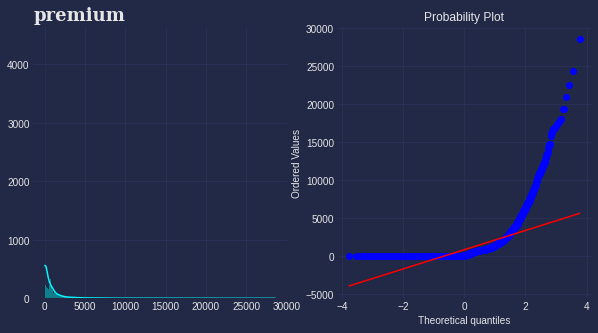

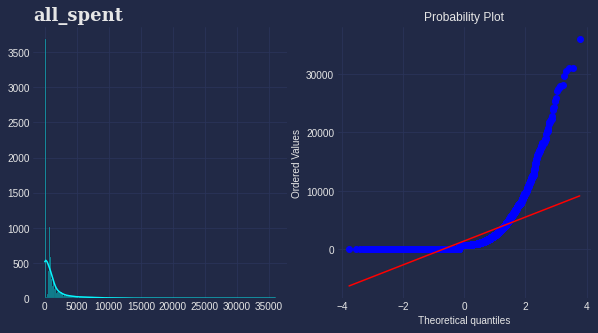

In [ ]:
# 분포 그려줌
qqplot(df_train, 'premium')
qqplot(df_train, 'all_spent')

how to interpret QQplot? <br>
* QQplot에 가까워지도록 data distribution을 transform<br>

data transformation 방법에는 다음과 같은 것들이 있다<br>
* square root
* cube root
* logarithmatic (log1p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

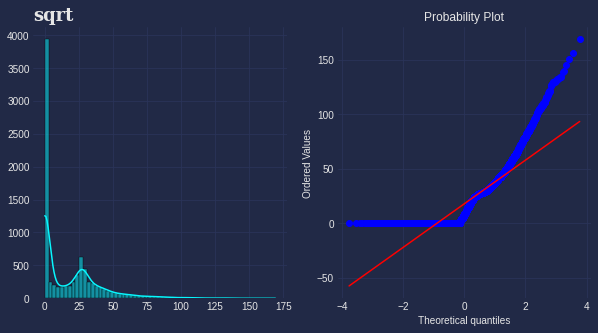

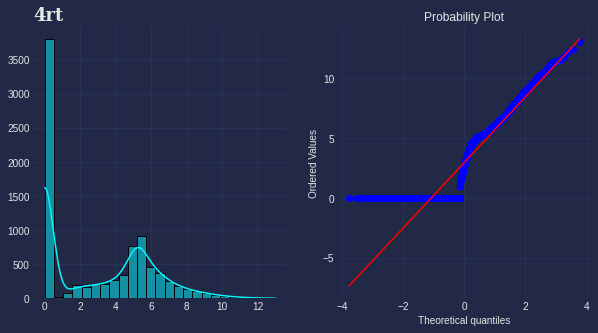

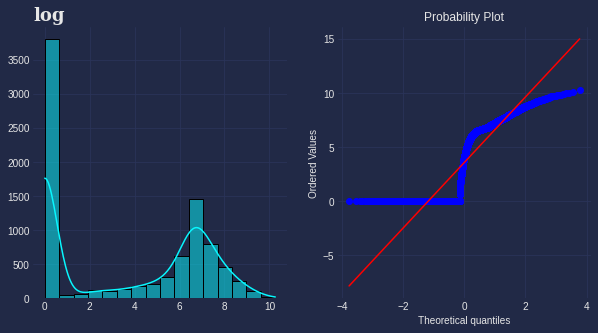

In [ ]:
# 사용하지 않을 변수 : underscore _ 에 값 저장
_ = df_train[['premium', 'transported']]
_['sqrt'] = _['premium']**(1./2)
_['4rt'] = _['premium']**(1./4)
_['log'] = np.log(_['premium']+1)

qqplot(_, 'sqrt')
qqplot(_, '4rt')
qqplot(_, 'log')

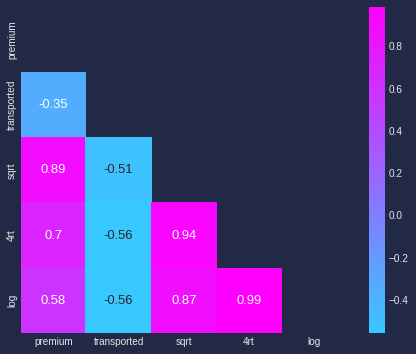

In [ ]:
plt.subplots(figsize = (8,6))
mask = np.triu(np.ones_like(_.corr()))
sns.heatmap(_.corr(), mask = mask, cmap = 'cool', annot = True, annot_kws = {'fontsize':13}, center = 0, square = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

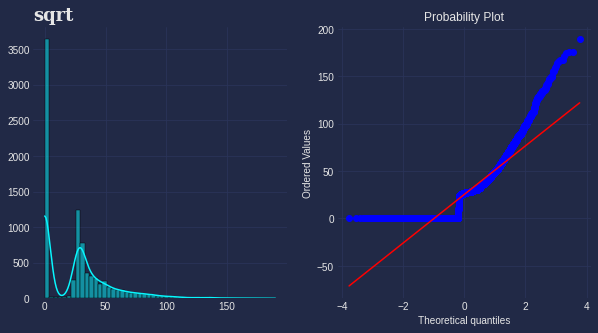

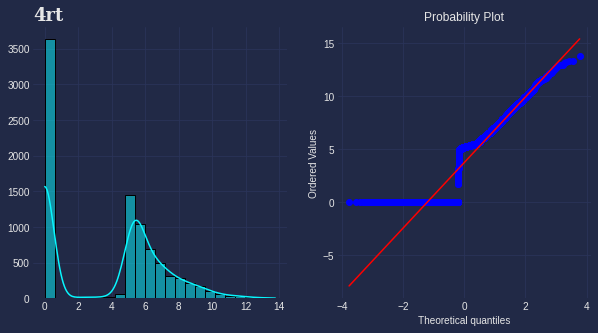

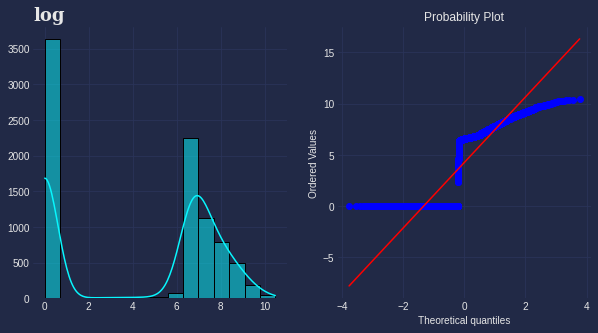

In [ ]:
_ = df_train[['all_spent', 'transported']]

_['sqrt'] = _['all_spent']**(1./2)
_['4rt'] = _['all_spent']**(1./4)
_['log'] = np.log(_['all_spent']+1)

qqplot(_, 'sqrt')
qqplot(_, '4rt')
qqplot(_, 'log')

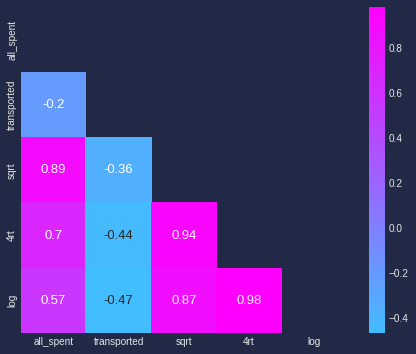

In [ ]:
plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(_.corr()))
sns.heatmap(_.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

In [ ]:
for dataset in df:
    dataset['spent'] = 0
    dataset.loc[dataset['all_spent'] > 0, 'spent'] = 1

### 2) 범주형 변수

참고로 수치형 변수 간 분포 관계를 나타내는 scatterplot처럼,<br>
범주형 변수의 분포를 나타내는 시각화 방법에는 stripplot / swarmplot이 있음<br>
1. stripplot : 범주 별, 데이터 포인트가 중복될 수 있음
2. swarmplot : 데이터 분산까지 고려, 데이터 포인트 중복되지 않음 (= 데이터가 퍼진 정도를 입체적으로 표현 가능)

###### 결측치 처리(mode)

In [ ]:
def count_plot(df, x_col_name, y_col_name) :
    plt.subplots(1,2, figsize = (15,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x = df[x_col_name].dropna(), hue = df[y_col_name])
    plt.title(str(x_col_name), 
              fontsize = 18, 
              fontweight = 'bold', 
              fontfamily = 'serif', 
              loc = 'left')
    ax.set(xlabel = None, ylabel = None)
    
    plt.subplot(1,2,2)
    plt.ylim(0,1)
    ax = sns.lineplot(data = df, x = df[x_col_name], y = df[y_col_name], ci = None, linewidth = 3, marker = 'o')
    ax.set(xlabel = None, ylabel = None)
    plt.show()

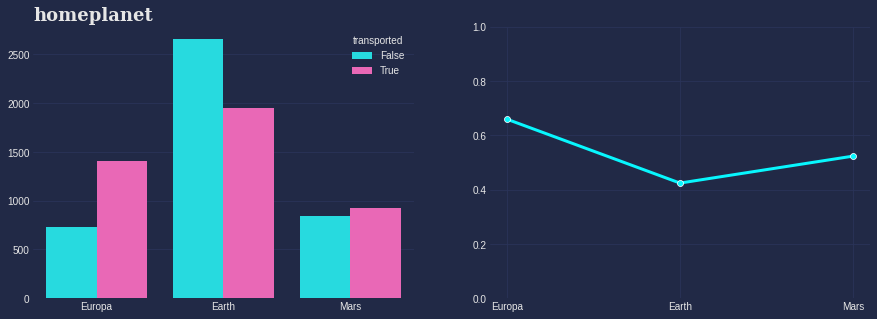

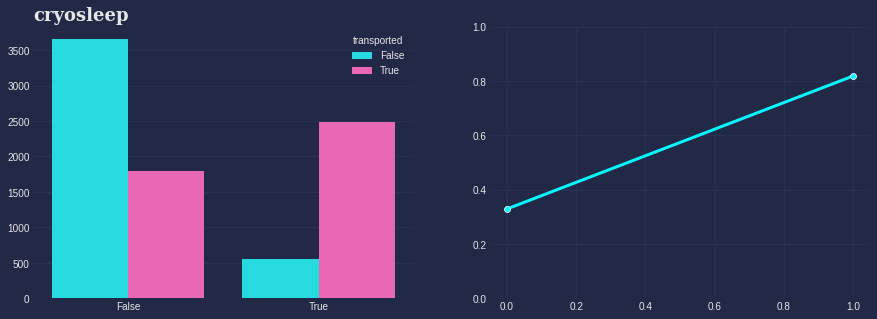

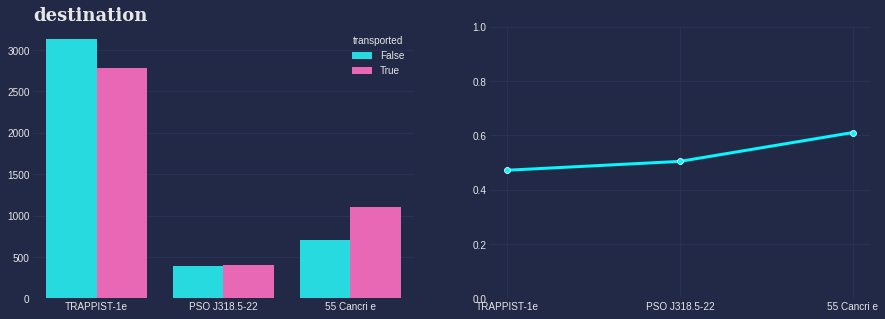

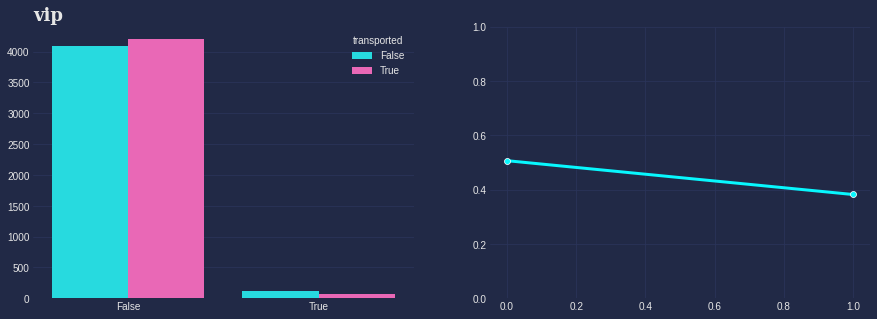

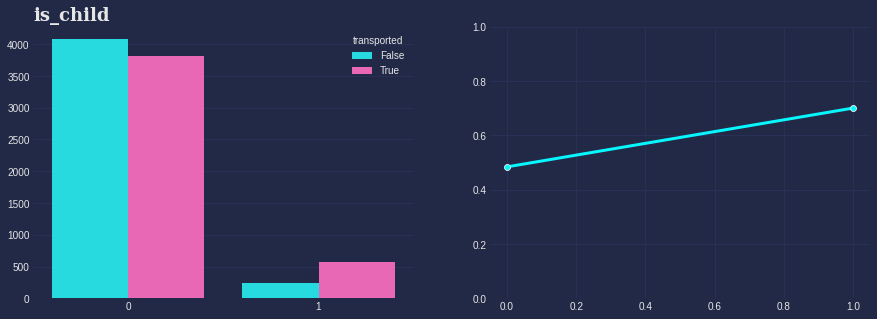

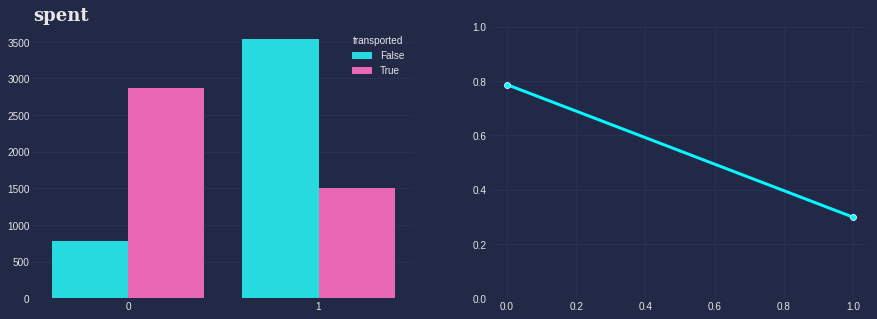

In [ ]:
count_plot(df_train, 'homeplanet', 'transported')
count_plot(df_train, 'cryosleep', 'transported')
count_plot(df_train, 'destination', 'transported')
count_plot(df_train, 'vip', 'transported')
count_plot(df_train, 'is_child', 'transported')
count_plot(df_train, 'spent', 'transported')


### 3) Mixed type

###### 파생변수 생성

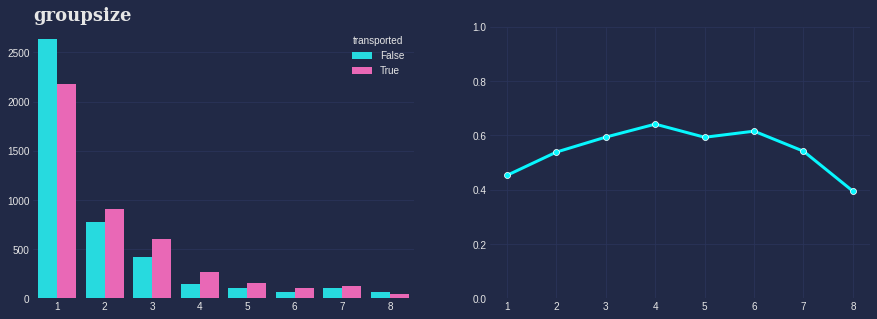

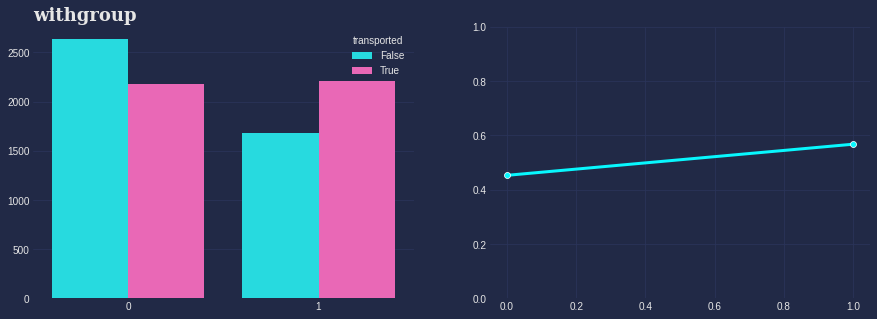

In [ ]:
# passengerid > group, groupsize
for dataset in df:
    dataset['group'] = dataset['passengerid'].apply(lambda x : x.split('_')[0]).astype(int)
    dataset['groupsize'] = dataset['group'].map(lambda x : dataset['group'].value_counts()[x])
    
    dataset['withgroup'] = 1 
    dataset.loc[dataset['groupsize'] == 1, 'withgroup'] = 0

count_plot(df_train, 'groupsize', 'transported')
count_plot(df_train, 'withgroup', 'transported')

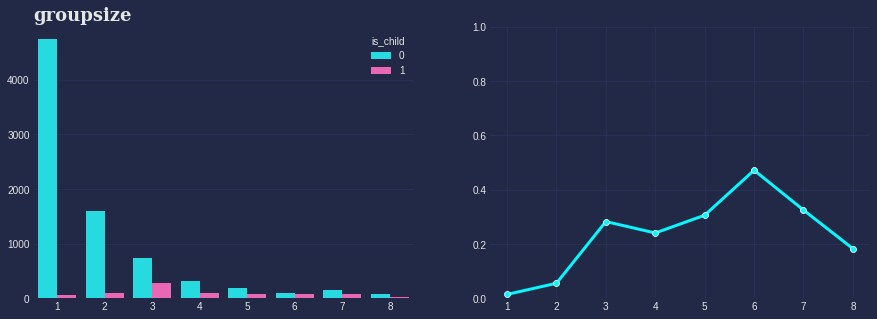

In [ ]:
count_plot(df_train, 'groupsize', 'is_child')

groupsize EDA 결과<BR>
1. 혼자 온 사람들이 대부분 (2인 이상 팟부터 급격하게 감소)
2. groupsize : 4 - 6 - 5 순으로 transport rate가 높음
3. groupsize : 8 - 1 순으로 transport rate 낮음
4. 

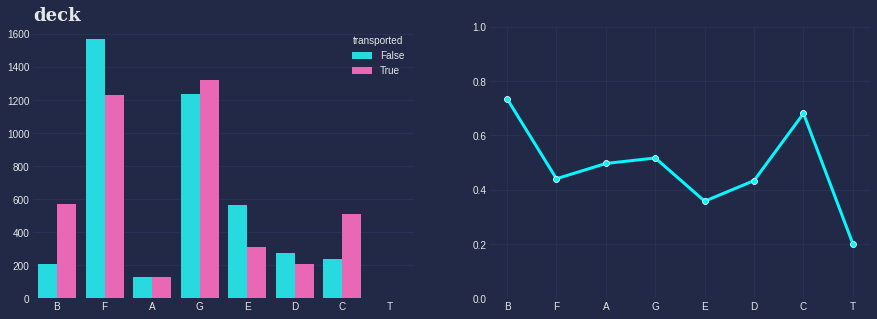

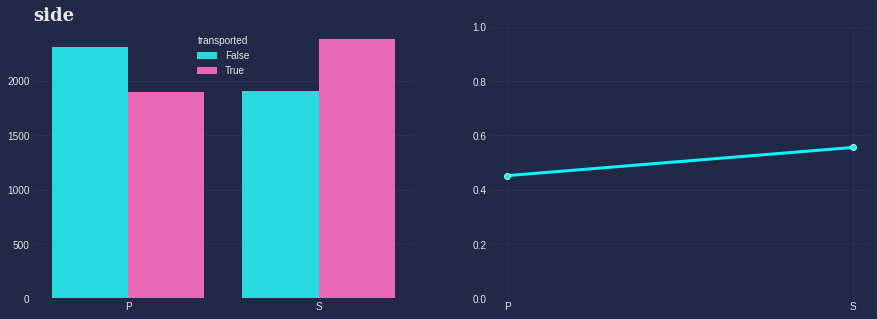

In [ ]:
# cabin > deck, num, side

for dataset in df:
    dataset['deck'] = dataset['cabin'].apply(lambda x : x.split('/')[0] if (str(x)) != 'nan' else x)
    dataset['num'] = dataset['cabin'].apply(lambda x : x.split('/')[1] if (str(x)) != 'nan' else x)
    dataset['side'] = dataset['cabin'].apply(lambda x : x.split('/')[2] if (str(x)) != 'nan' else x)

count_plot(df_train, 'deck', 'transported')
count_plot(df_train, 'side', 'transported')


cabin - deck/side EDA 결과<BR>
1. 승객 대다수가 Cabin deck - F/G에 머무르고 있음
2. Cabin deck B/C에 머무르는 승객들 : Transport rate가 높음
3. Cabin deck T에 머무르는 승객들 : Transport rate가 낮지만, 샘플 수 자체가 너무 작다는 한계
----------------------------------------------------------
4. 근소한 차이지만, side S에 머무르는 승객들 Transport rate가 더 높음

In [ ]:
# Name > First/Last names
for dataset in df :
    dataset['firstname'] = dataset['name'].apply(lambda x : x.split(" ")[0] if (str(x) != 'nan') else x)
    dataset['lastname'] = dataset['name'].apply(lambda x : x.split(" ")[1] if (str(x) != 'nan') else x)
    # familysize
    dataset['familysize'] = dataset['lastname'].map(lambda x : dataset['lastname'].value_counts()[x] if (str(x) != 'nan') else x)


In [ ]:
def count_plot_adj(df, x_col_name, y_col_name):
    plt.subplots(1,2, figsize = (15,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x = df[x_col_name].dropna(), hue = df[y_col_name])
    plt.title(str(x_col_name), 
              fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
              loc = 'left')
    ax.set(xlabel = None, ylabel = None)

    plt.subplot(1,2,2)
    plt.ylim(0,1)
    ax = sns.lineplot(x = df[x_col_name], y = df[y_col_name], 
                      ci = None, linewidth = 3, marker = 'o')
    ax.set(xlabel = None, ylabel = None, xlim = (1,18))
    
    plt.show()

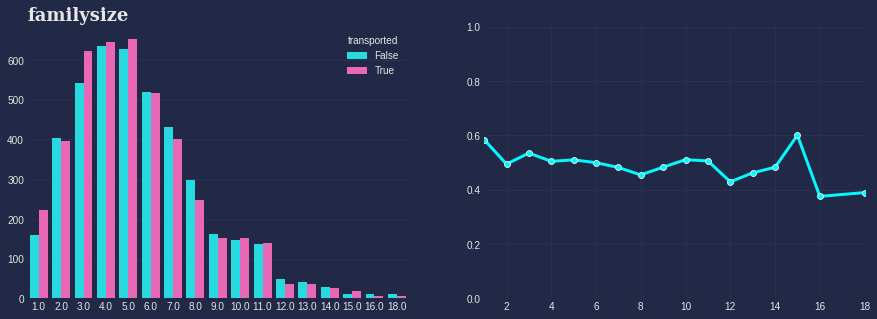

In [ ]:
count_plot_adj(df_train, 'familysize', 'transported')

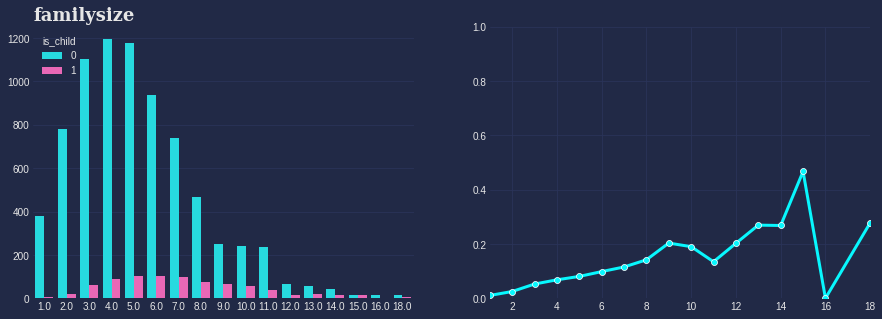

In [ ]:
count_plot_adj(df_train, 'familysize', 'is_child')

familysize EDA 결론<BR>
1. Familysize - 3,4,5인 승객들이 대다수
2. 전반적으로 familysize가 증가하면 transport rate가 낮아짐 (단, 15 제외)
3. 어린이 승객의 분포 역시, familysize가 증가할수록 대체로 증가하는 추세 (단, 10인 이상 가족에서 예외적인 샘플이 존재)

주의) 범주형 변수의 경우, 참/거짓 등 이분화된 dichotomous or ordinal 변수가 아니라면, 변수 간 상관관계 평가가 불가능함. <br>
Non-ordinal / 3개 이상 클래스로 나누어진 범주형 변주의 경우, 상관관계 분석보다 **tests of independency**를 시행하는 게 더 적절함. <br>
- 본 노트북에선 카이제곱검정에 기반한 **Cramer's V**를 사용함<BR>
- 단 카이제곱검정을 시행하기 전에, 숫자로 label encoding 되었는지 확인!

In [ ]:
# label-encoding
from sklearn.preprocessing import LabelEncoder
# label_encode = LabelEncoder()
df1 = df_train.copy()
df_cat = df1[['homeplanet', 'cryosleep', 'destination', 'vip', 'is_child', 'spent', 'group', 'withgroup', 'deck', 'num', 'side', 'lastname', 'transported']]

label = LabelEncoder()
df_cat_encoded = pd.DataFrame()
for column in df_cat.columns : 
    df_cat_encoded[column] = label.fit_transform(df_cat[column])

df_cat_encoded.head(3)

,homeplanet,cryosleep,destination,vip,is_child,spent,group,withgroup,deck,num,side,lastname,transported
0,1,0,2,0,0,0,0,0,1,0,0,1431,0
1,0,0,2,0,0,1,1,0,5,0,1,2109,1
2,1,0,2,1,0,1,2,1,0,0,1,1990,0


In [ ]:
# # association 관련 dependent library 불러오기
# !pip install scipy
# !pip install matplotlib-venn
# !apt-get -qq install -y libfluidsynth1
# # https://pypi.python.org/pypi/libarchive
# !apt-get -qq install -y libarchive-dev && pip install -U libarchive
# import libarchive
# # https://pypi.python.org/pypi/pydot
# !apt-get -qq install -y graphviz && pip install pydot
# import pydot
# !pip install cartopy
# import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # association 불러오기
# from scipy.stats.contingency import association

# def Cramers_V(feature1, feature2):
#     crosstab = np.array(pd.crosstab(index = feature1, columns = feature2))
#     return (association(crosstab, method = 'cramer'))
    
# # Cramer's V - 결과물 dataframe matrix 생성
# rows = []

# for var1 in df_cat_encoded : 
#     col = []

#     for var2 in df_cat_encoded : 
#         V = Cramers_V(df_cat_encoded[var1], df_cat_encoded[var2])
#         col.append(V)
#     rows.append(col)

# cramers_v_results = np.array(rows)
# cramers_v_df = pd.DataFrame(cramers_v_results, columns = df_cat_encoded.columns, index = df_cat_encoded.columns)



ImportError: ignored

Observations. There is a lot to dig in here because my approach to feature engineering was rather exhaustive. As a result, multicollinearity tend to occur, this happens when two or more independent variables are highly associated with one another, rendering them redundant.

###### 결측치 처리


아래 7개 질문에 대한 답을 확인함으로써, 각 feature 별로 어떤 correlated feature를 이용해서 결측치를 매꿔야할지 기준을 세울 수 있음

1. passengerid - group vs name - lastname (family : 같은 last name 가짐?)
2. passengerid - group vs homeplanet/destination (같은 여행 그룹에 속한 사람들은 같은 행성에서 출발/도착?)
3. passengerid - group vs cabin (같은 여행그룹 사람들은 같은 cabin에 묵음?)
4. cryosleep vs cabin (cryosleep 이용 승객들은 특정 cabin에만 머무름?)
5. cryosleep vs services (cryosleep 이용 승객들은 기타 어메니티 이용률 낮음?)
6. cryosleep vs with group (혼자 여행온 사람들이 cryosleep 더 이용함?)
7. cryosleep vs homeplanet/destination (cryosleep 이용 여부와, 승객들 여행 거리 사이에 관계가 있을까?)



In [ ]:
df_train.groupby(['transported', 'cryosleep'])['cryosleep'].value_counts()

transported  cryosleep  cryosleep
False        False      False        3650
             True       True          554
True         False      False        1789
             True       True         2483
Name: cryosleep, dtype: int64

In [ ]:
df_train.groupby(['transported', 'cryosleep'])['cryosleep'].size()

transported  cryosleep
False        False        3650
             True          554
True         False        1789
             True         2483
Name: cryosleep, dtype: int64

In [ ]:
# 결측치 채우는 함수 
def impute_cat(col_name1, col_name2):
    print('Before %s Train: ' %col_name2, df_train[col_name2].isnull().sum())
    print('Before %s Test: ' %col_name2, df_test[col_name2].isnull().sum())

    df_test['transported'] = np.NaN
    df_full = pd.concat([df_train, df_test])

    reference = df_full.groupby([col_name1, col_name2])[col_name2].size().unstack().fillna(0)

    for dataset in df :
        index = dataset[dataset[col_name2].isnull()][(dataset.loc[dataset[col_name2].isnull()][col_name1]).isin(reference.index)].index
        dataset.loc[index, col_name2] = dataset.loc[index, col_name1].map(lambda x : reference.idxmax(axis = 1)[x])

    print('After %s Train: ' %col_name2, df_train[col_name2].isnull().sum())
    print('After %s Test: ' %col_name2, df_test[col_name2].isnull().sum())
    print('\n')                                                 

In [ ]:
# if spent == 1, then cryosleep = False
print('Before Train: ', df_train.cryosleep.isnull().sum())
print('Before Test: ', df_test.cryosleep.isnull().sum())

for dataset in df:
    dataset.loc[(dataset.cryosleep.isnull()) & (dataset.spent == 0), 'cryosleep'] = True
    dataset.loc[(dataset.cryosleep.isnull()) & (dataset.spent == 1), 'cryosleep'] = False

print('After Train: ', df_train.cryosleep.isnull().sum())
print('After Test: ', df_test.cryosleep.isnull().sum())


Before Train:  217
Before Test:  93
After Train:  0
After Test:  0


In [ ]:
# cryosleep > remaining expenditures 결측치 채워줌
for dataset in df :
    dataset['roomservice'] = dataset['roomservice'].fillna(dataset.groupby(['is_child', 'cryosleep'])['roomservice'].transform('median'))
    dataset['foodcourt'] = dataset['foodcourt'].fillna(dataset.groupby(['is_child', 'cryosleep'])['foodcourt'].transform('median'))
    dataset['spa'] = dataset['spa'].fillna(dataset.groupby(['is_child', 'cryosleep'])['spa'].transform('median'))
    dataset['vrdeck'] = dataset['vrdeck'].fillna(dataset.groupby(['is_child', 'cryosleep'])['vrdeck'].transform('median'))
    dataset['shoppingmall'] = dataset['shoppingmall'].fillna(dataset.groupby(['is_child', 'cryosleep'])['shoppingmall'].transform('median'))

    # 결측치 채워준 거 기준으로 expenditures 다시 업데이트
    dataset['premium'] = dataset['roomservice'] + dataset['spa'] + dataset['vrdeck']
    dataset['basic'] = dataset['foodcourt'] + dataset['shoppingmall']
    dataset['all_spent'] = dataset['premium'] + dataset['basic']
    # spent도 업데이트
    dataset['spent'] = 0
    dataset.loc[dataset.all_spent > 0, 'spent'] = 1

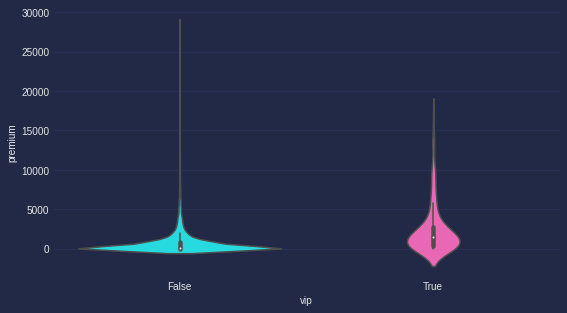

In [ ]:
# vip - service expenditure
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.violinplot(data = df_train, x = 'vip', y = 'premium')

위 바이올린플랏을 통해, VIP들이 일반 승객에 비해 일반적으로 프리미엄 서비스에 더 많은 비용을 지불하고 있음을 알 수 있음.

In [ ]:
print('Before Train:', df_train['vip'].isnull().sum())
print('Before Test:', df_test['vip'].isnull().sum())

for dataset in df:
    dataset['vip'].fillna(False, inplace=True)
    
print('After Train:', df_train['vip'].isnull().sum())
print('After Test:', df_test['vip'].isnull().sum())

Before Train: 203
Before Test: 93
After Train: 0
After Test: 0


In [ ]:
 cd_pg = df_train.groupby(['group', 'deck'])['deck'].size().unstack().fillna(0)
 cd_pg.head(10)

deck,A,B,C,D,E,F,G,T
group,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
cs_pg = df_train.groupby(['group', 'side'])['side'].size().unstack().fillna(0)
cs_pg.head(10)

side,P,S
group,,
1,1.0,0.0
2,0.0,1.0
3,0.0,2.0
4,0.0,1.0
5,1.0,0.0
6,0.0,2.0
7,0.0,1.0
8,3.0,0.0
9,1.0,0.0


위 테이블을 통해, 같이 여행을 온 사람들은 같은 cabin deck/side에 묵고 있음을 알 수 있음

In [ ]:
# 앞에서 정의한 결측치 채우는 함수 
# def impute_cat(col_name1, col_name2):
#     df_full = pd.concat([df_train, df_test])
#     reference = df_full.groupby([col_name1, col_name2])[col_name2].size().unstack().fillna(0)
#     for dataset in df :
#         index = dataset[dataset[col_name2].isnull()][(dataset.loc[dataset[col_name2].isnull()][col_name1]).isin(reference.index)].index
#         dataset.loc[index, col_name2] = dataset.loc[index, col_name1].map(lambda x : reference.idxmax(axis = 1)[x])

In [ ]:
df_train[df_train['deck'].isnull()].head(3)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,...,spent,group,groupsize,withgroup,deck,num,side,firstname,lastname,familysize
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,...,1,12,1,0,NaN,NaN,NaN,Justie,Pooles,7.0
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,...,0,101,1,0,NaN,NaN,NaN,Book,Trad,3.0
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,...,1,110,4,1,NaN,NaN,NaN,Graviph,Aloubtled,5.0


In [ ]:
(df_train.loc[df_train['deck'].isnull()]['transported']).head(3)
# .isin(df_train.groupby(['transported', 'deck'])['deck'].size().unstack().fillna(0).index)].index

15     False
93      True
103    False
Name: transported, dtype: bool

In [ ]:
df_train.groupby(['transported', 'deck'])['deck'].size()

transported  deck
False        A        129
             B        207
             C        239
             D        271
             E        563
             F       1565
             G       1238
             T          4
True         A        127
             B        572
             C        508
             D        207
             E        313
             F       1229
             G       1321
             T          1
Name: deck, dtype: int64

In [ ]:
df_train.groupby(['transported', 'deck'])['deck'].size().unstack()

deck,A,B,C,D,E,F,G,T
transported,,,,,,,,
False,129,207,239,271,563,1565,1238,4
True,127,572,508,207,313,1229,1321,1


In [ ]:
df_train.groupby(['transported', 'deck'])['deck'].size().unstack().fillna(0)

deck,A,B,C,D,E,F,G,T
transported,,,,,,,,
False,129,207,239,271,563,1565,1238,4
True,127,572,508,207,313,1229,1321,1


In [ ]:
df_train.groupby(['transported', 'deck'])['deck'].size().unstack().fillna(0).index

Index([False, True], dtype='object', name='transported')

In [ ]:
df_train[df_train['deck'].isnull()][(df_train.loc[df_train['deck'].isnull()]['transported']).isin(df_train.groupby(['transported', 'deck'])['deck'].size().unstack().fillna(0).index)].index

Int64Index([  15,   93,  103,  222,  227,  251,  260,  272,  280,  295,
            ...
            8043, 8066, 8110, 8168, 8202, 8209, 8475, 8485, 8509, 8656],
           dtype='int64', length=199)

In [ ]:
# Imputing Deck
impute_cat('group', 'deck')
impute_cat('group', 'side')

Before deck Train:  199
Before deck Test:  100
After deck Train:  99
After deck Test:  63


Before side Train:  199
Before side Test:  100
After side Train:  99
After side Test:  63




여행 그룹 기준으로 cabin deck, side 결측치 채워줬지만, 여전히 결측치가 남아있음. 이거 name 피쳐에서 뽑아낸 lastname으로 나중에 매꿔주겠음

In [ ]:
hp_pg = df_train.groupby(['group', 'homeplanet'])['homeplanet'].size().unstack().fillna(0)
hp_pg.head(10)

homeplanet,Earth,Europa,Mars
group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,2.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,3.0,0.0
9,0.0,0.0,1.0


In [ ]:
d_pg = df_train.groupby(['group', 'destination'])['destination'].size().unstack().fillna(0)
d_pg.head(10)

destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
group,,,
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,2.0
7,0.0,0.0,1.0
8,2.0,0.0,1.0
9,0.0,0.0,1.0


travel group no#8, 처럼. 서로 다른 행성으로 가는 경우도 분명 있어 보이지만..<br>
본 노트북에서는 같은 그룹 사람들은 **같은 행성 출발, 같은 행성 도착**을 전제하고 있음. 해당 가설을 기준으로 투어그룹에 근거해서 homeplanet, destination 결측치를 채워주겠음

In [ ]:
# homeplanet, destination 결측치 채우기
impute_cat('group', 'homeplanet')
impute_cat('group', 'destination')

Before homeplanet Train:  201
Before homeplanet Test:  87
After homeplanet Train:  111
After homeplanet Test:  46


Before destination Train:  182
Before destination Test:  92
After destination Train:  103
After destination Test:  51




group에 근거해서 결측치를 채워줬음에도, homeplanet/destination엔 여전히 결측치가 존재함<br>
따라서 두 번째로 연관성이 높은 lastname을 기준으로 결측치를 채워주겠음

In [ ]:
ln_hp = df_train.groupby(['lastname', 'homeplanet'])['homeplanet'].size().unstack().fillna(0)
ln_hp.head(10)

homeplanet,Earth,Europa,Mars
lastname,,,
Acobson,4.0,0.0,0.0
Acobsond,3.0,0.0,0.0
Adavisons,9.0,0.0,0.0
Adkinson,3.0,0.0,0.0
Admingried,0.0,4.0,0.0
Aginge,0.0,1.0,0.0
Ailled,0.0,2.0,0.0
Aillyber,0.0,3.0,0.0
Aiming,0.0,1.0,0.0


In [ ]:
ln_d = df_train.groupby(['lastname', 'destination'])['destination'].size().unstack().fillna(0)
ln_d.head(10)

destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
lastname,,,
Acobson,1.0,0.0,3.0
Acobsond,0.0,0.0,3.0
Adavisons,1.0,1.0,7.0
Adkinson,0.0,1.0,2.0
Admingried,1.0,0.0,3.0
Ageurante,1.0,0.0,0.0
Aginge,0.0,0.0,1.0
Ailled,2.0,0.0,0.0
Aillyber,2.0,0.0,1.0


In [ ]:
impute_cat('lastname', 'homeplanet')
impute_cat('lastname', 'destination')

Before homeplanet Train:  111
Before homeplanet Test:  46
After homeplanet Train:  8
After homeplanet Test:  5


Before destination Train:  103
Before destination Test:  51
After destination Train:  4
After destination Test:  2




In [ ]:
# 여전히 존재하는 결측치 : 세 번째로 연관성이 높은 feature, deck에 근거해서 채워줌
cd_hp = df_train.groupby(['deck', 'homeplanet'])['homeplanet'].size().unstack().fillna(0)
cd_hp.head(10)

homeplanet,Earth,Europa,Mars
deck,,,
A,0.0,261.0,0.0
B,0.0,796.0,0.0
C,0.0,760.0,0.0
D,0.0,195.0,291.0
E,406.0,135.0,344.0
F,1656.0,0.0,1150.0
G,2587.0,0.0,0.0
T,0.0,5.0,0.0


In [ ]:
cd_d = df_train.groupby(['deck', 'destination'])['destination'].size().unstack().fillna(0)
cd_d.head(10)

destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
deck,,,
A,114.0,2.0,146.0
B,350.0,3.0,443.0
C,329.0,14.0,417.0
D,116.0,17.0,354.0
E,120.0,42.0,723.0
F,408.0,249.0,2151.0
G,377.0,468.0,1742.0
T,0.0,0.0,5.0


In [ ]:
impute_cat('deck', 'homeplanet')
impute_cat('deck', 'destination')

Before homeplanet Train:  8
Before homeplanet Test:  5
After homeplanet Train:  0
After homeplanet Test:  0


Before destination Train:  4
Before destination Test:  2
After destination Train:  0
After destination Test:  0




In [ ]:
hp_d_sp_cd = df_train.groupby(['homeplanet', 'destination', 'spent', 'deck'])['deck'].size().unstack().fillna(0)
hp_d_sp_cd.head(20)

deck                               A      B      C      D      E       F  \
homeplanet destination   spent                                             
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0    4.0     5.0   
                         1       0.0    0.0    0.0    0.0   45.0   272.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0    3.0     4.0   
                         1       0.0    0.0    0.0    0.0   26.0   225.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0   19.0    13.0   
                         1       0.0    0.0    0.0    0.0  309.0  1141.0   
Europa     55 Cancri e   0      39.0  217.0  160.0   32.0   26.0     0.0   
                         1      75.0  133.0  169.0   36.0   24.0     0.0   
           PSO J318.5-22 0       1.0    1.0    7.0    0.0    0.0     0.0   
                         1       1.0    2.0    7.0    0.0    0.0     0.0   
           TRAPPIST-1e   0      51.0  263.0  162.0   43.0   32.0     0.0   
                         1      95.0  180.0  256.0   84.0   53.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   12.0    7.0    78.0   
                         1       0.0    0.0    0.0   36.0   14.0    53.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0    9.0     4.0   
                         1       0.0    0.0    0.0   17.0    4.0    16.0   
           TRAPPIST-1e   0       0.0    0.0    0.0   23.0  136.0   554.0   
                         1       0.0    0.0    0.0  204.0  174.0   445.0   

deck                                 G    T  
homeplanet destination   spent               
Earth      55 Cancri e   0       282.0  0.0  
                         1        95.0  0.0  
           PSO J318.5-22 0       375.0  0.0  
                         1        93.0  0.0  
           TRAPPIST-1e   0      1039.0  0.0  
                         1       704.0  0.0  
Europa     55 Cancri e   0         0.0  0.0  
                         1         0.0  0.0  
           PSO J318.5-22 0         0.0  0.0  
                         1         0.0  0.0  
           TRAPPIST-1e   0         0.0  0.0  
                         1         0.0  5.0  
Mars       55 Cancri e   0         0.0  0.0  
                         1         0.0  0.0  
           PSO J318.5-22 0         0.0  0.0  
                         1         0.0  0.0  
           TRAPPIST-1e   0         0.0  0.0  
                         1         0.0  0.0

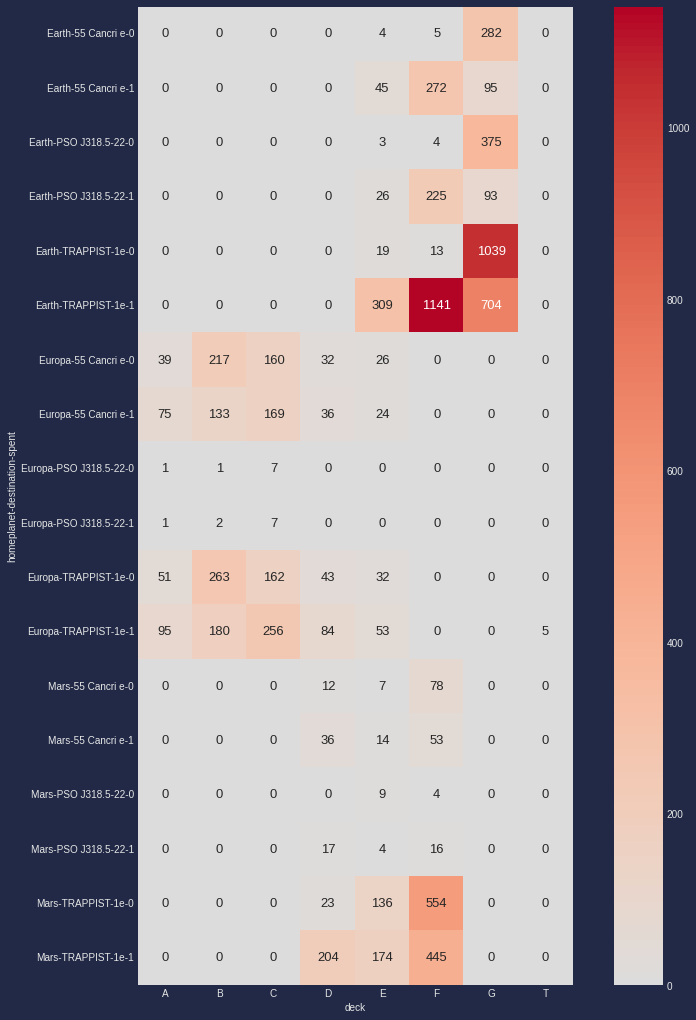

In [ ]:
plt.subplots(figsize = (15, 18))
sns.heatmap(hp_d_sp_cd, cmap = 'coolwarm', annot = True, annot_kws={'fontsize':13}, fmt = 'g', center = 0, square = True)

위 히트맵 그래프를 통해 다음의 사실을 확인할 수 있음<br>
1. cabin E/F/G : 대부분이 지구 탑승 승객들
2. cabin A/B/C/D/E : 대부분이 유로파 발 승객들
3. cabin D/E/F : 대부분이 Mars 발 승객
4. 

In [ ]:
pg_sn = df_train.groupby(['group', 'lastname'])['lastname'].size().fillna(0)
pg_sn.head(10)

group  lastname   
1      Ofracculy      1
2      Vines          1
3      Susent         2
4      Santantines    1
5      Hinetthews     1
6      Jacostaffey    2
7      Beston         1
8      Flatic         3
9      Barne          1
10     Baketton       1
Name: lastname, dtype: int64

In [ ]:
impute_cat('group', 'lastname')

Before lastname Train:  200
Before lastname Test:  94
After lastname Train:  104
After lastname Test:  51




last name 자체로는 쓸 일이 없지만, familysize 피처 결측치 채우기 위해 lastname도 전처리가 필요<br>
같은 그룹 내에서 다수의 사람들이 같은 last name을 가지고 있지만, 모두가 그런 건 아님. 여전히 남아있는 결측치는, 해당 그룹 내에서 가장 높은 빈도로 존재하는 최빈값으로 채워줄 것임

In [ ]:
impute_cat('homeplanet', 'lastname')

Before lastname Train:  104
Before lastname Test:  51
After lastname Train:  0
After lastname Test:  0




In [ ]:
# lastname 기준으로 familysize 결측치 채워줌
for dataset in df : 
    dataset['familysize'] = dataset['lastname'].map(lambda x : dataset['lastname'].value_counts()[x] if (str(x) != 'nan') else x)


In [ ]:
impute_cat('lastname', 'deck')
impute_cat('homeplanet', 'deck')

impute_cat('lastname', 'side')
impute_cat('homeplanet', 'side')

Before deck Train:  99
Before deck Test:  63
After deck Train:  4
After deck Test:  0


Before deck Train:  4
Before deck Test:  0
After deck Train:  0
After deck Test:  0


Before side Train:  99
Before side Test:  63
After side Train:  4
After side Test:  0


Before side Train:  4
Before side Test:  0
After side Train:  0
After side Test:  0




In [ ]:
missing_values(df_train)[missing_values(df_train)['Missing Values']>0]

,Features,Missing Values,Missing Percentage(%)
5,age,401,4.61
25,firstname,200,2.30
12,name,200,2.30
3,cabin,199,2.29
23,num,199,2.29


In [ ]:
missing_values(df_test)[missing_values(df_test)['Missing Values']>0]

,Features,Missing Values,Missing Percentage(%)
27,transported,4277,100.00
5,age,180,4.21
3,cabin,100,2.34
22,num,100,2.34
24,firstname,94,2.20
12,name,94,2.20


아직 결측치가 존재하는 피쳐가 몇 보이지만, 이어질 모델 학습에서 위 피쳐들은 사용하지 않으므로, 추가 작업은 하지 않음

# 5. 데이터 전처리

'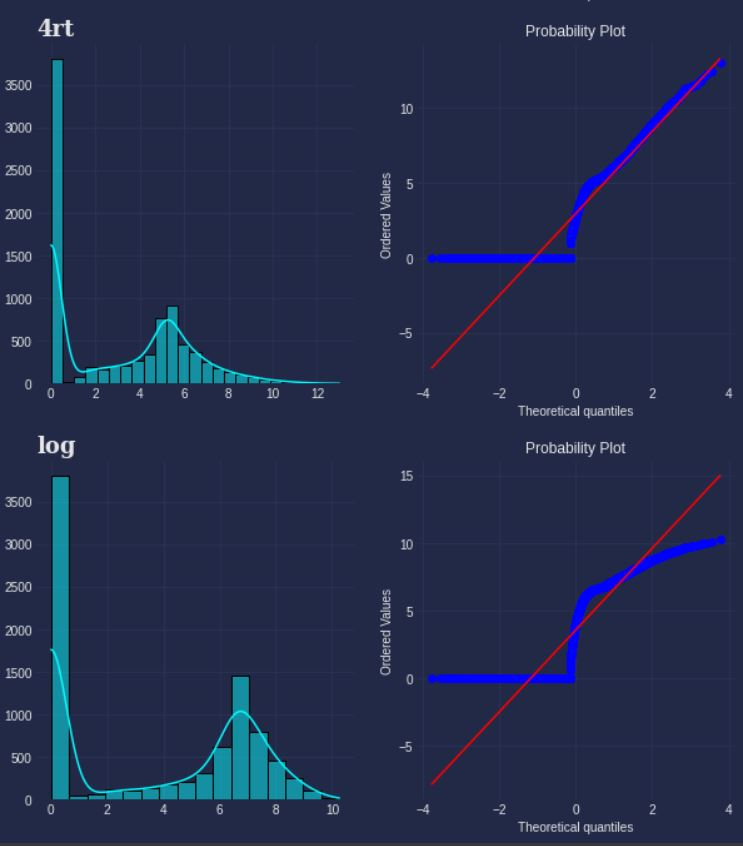'

위 그림은 premium feature의 4th root / log transformation qqplot임.<br>
log보다 4th root를 취했을 때, 샘플 데이터 분포가 정규분포에 가장 가까워지는 걸 알 수 있음. 따라서 4th root를 취해줌

In [ ]:
# vip : bool > object
for dataset in df :
    dataset['vip'] = dataset['vip'].astype(object)
    # 4th root transform of premium (데이터 분포 정규분포화 위함)
    dataset.premium = dataset.premium ** (1./4)
    dataset.all_spent = dataset.all_spent ** (1./4)
    dataset.basic = dataset.basic ** (1./4)
    

In [ ]:
df_test.drop('transported', axis = 1, inplace = True)


In [ ]:
# 범주형 object 변수 > label encoding 
for dataset in df :
    dataset['side'] = label.fit_transform(dataset['side'])
    dataset['cryosleep'] = label.fit_transform(dataset['cryosleep'])

In [ ]:
y_train = df_train['transported']
X_train = df_train[['cryosleep', 'premium', 'basic', 'is_child', 'withgroup', 'homeplanet', 'destination', 'deck', 'side']]

X_test = df_train[['cryosleep', 'premium', 'basic', 'is_child', 'withgroup', 'homeplanet', 'destination', 'deck', 'side']]

X = [X_train, X_test]

In [ ]:
# feature 형태 분석에 좋게 바꿔줌
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# 수치형 변수 > scaling
X_train[['premium']] = scale.fit_transform(X_train[['premium']])
X_test[['premium']] = scale.transform(X_test[['premium']])

X_train[['basic']] = scale.fit_transform(X_train[['basic']])
X_test[['basic']] = scale.transform(X_test[['basic']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
# 범주형 변수 일부 one-hot-encoding 
X_train = pd.get_dummies(X_train, columns = ['homeplanet', 'destination', 'deck'])
X_test = pd.get_dummies(X_test, columns = ['homeplanet', 'destination', 'deck'])

# 6. 알고리즘 불러오기

In [ ]:
# XGBClassifier 불러오기 위해 필요한 라이브러리
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import cross_val_score
# model algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassfier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassfier

###### 기본 parameter 모델링

In [ ]:
# 본 노트북에서 사용해줄 머신러닝 알고리즘 리스트
mla = [
       LogisticRegression(max_iter = 2000), 
       SVC(),
       KNeighborsClassifier(),
       DecisionTreeClassifier(), 
       LGBMClassifier(), 
    #    XGBClassifier(), 
    #    CatBoostClassifier(verbose = False)
]


In [ ]:
row_index = 0

# 모델 간 성능 비교하기 위한 table 생성
mla_cols = ['Model', 'Accuracy']
mla_compare = pd.DataFrame(columns = mla_cols)
mla_compare

,Model,Accuracy


In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier().__class__

sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
DecisionTreeClassifier().__class__.__name__

'DecisionTreeClassifier'

In [ ]:
X_train.head(3)

,cryosleep,premium,basic,is_child,withgroup,side,homeplanet_Earth,homeplanet_Europa,homeplanet_Mars,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,0,-0.997377,-0.873889,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0.727779,-0.007413,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,2.046892,1.900940,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
cv_temp = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=10, scoring = 'accuracy', error_score = 'raise' )
cv_temp

array([0.75977011, 0.73448276, 0.75747126, 0.75143843, 0.75258918,
       0.78941312, 0.75949367, 0.77560414, 0.78596087, 0.75834292])

In [ ]:
# 위에서 선언한 머신러닝 알고리즘 - 실행, 결과 저장
for model in mla : 
    mla_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring = 'accuracy')
    mla_compare.loc[row_index, 'accuracy'] = float(cv_results.mean())

    row_index += 1

# 결과 테이블 리턴
mla_compare.sort_values(by=['accuracy'], ascending=False, inplace=True)
mla_compare

,Model,accuracy
4,LGBMClassifier,0.806862
1,SVC,0.804330
0,LogisticRegression,0.796852
2,KNeighborsClassifier,0.781781
3,DecisionTreeClassifier,0.763378


###### 하이퍼파라미터 튜닝

파라미터 설정을 않은 기본 모델로 돌렸을 때, 가장 성능이 좋았던 LGBM/SVC에 대해서 하이퍼파라미터 튜닝 후 성능을 보려함

In [ ]:
!pip install optuna
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

import optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 46.0 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 112 kB 39.8 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 146 kB 41.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4c447f64b17880c2fbcd803755ac058d43f87e8d4ceebbf116df8e74e7ab82ee
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in i

기존의 하이퍼파라미터 튜닝 (수업시간 중에 배운)
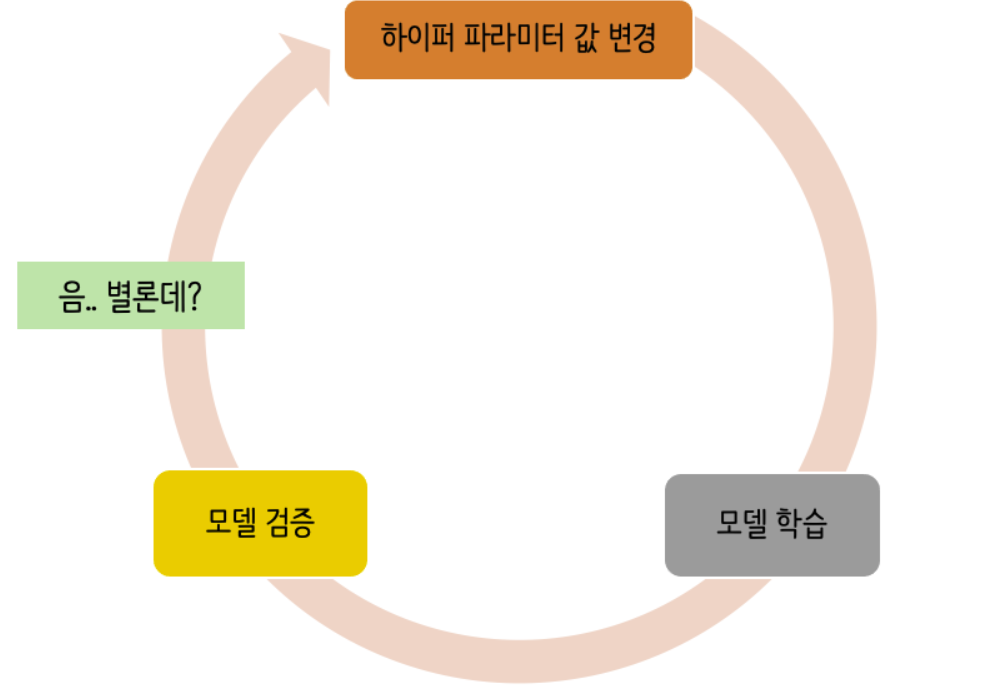

Optuna는 하이퍼 파라미터가 될 수 있는 범위나 목록을 지정해주면, trial마다 값을 변경하며 최적의 파라미터를 찾아냄.

[하이퍼파라미터 튜닝 최적화 프레임워크 Optuna 설명](https://ssoonidev.tistory.com/107)


In [ ]:
Trial.suggest_categorical?


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# LGBM
from optuna.integration import LightGBMPruningCallback
from lightgbm import early_stopping

def objective(trial, data = X_train, target = y_train):
    param = {
        'n_estimators': 5000,
        # 'num_leaves': trial.suggest_int(name = 'num_leaves', low = 20, high = 3000, step=20),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 200, 10000, step=100),
        'learning_rate': trial.suggest_loguniform(name = 'learning_rate', low = 0.01, high = 0.3),
        'max_depth': trial.suggest_int(name = 'max_depth', low = 3, high = 10),
        'min_child_samples': trial.suggest_int(name = 'min_child_samples', low = 1, high = 15),
        'reg_alpha': trial.suggest_loguniform(name = 'reg_alpha', low = 1e-3, high = 10),
        'reg_lambda': trial.suggest_loguniform(name = 'reg_lambda', low = 1e-3, high = 10),
        'subsample': trial.suggest_categorical(name = 'subsample', choices = [0.5, 0.6, 0.7, 0.8, 0.9])
    }

    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

    for index, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

        model = LGBMClassifier(**param)
        model.fit(x_trn, y_trn,
                  eval_set = [(x_val, y_val)], 
                  eval_metric = 'logloss', 
                  callbacks = [eary_stopping(stopping_rounds = 100, 
                                             verbose = False)], 
                  verbose = False,
                  )
        
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)

    return np.mean(scores)
        

In [ ]:
# LGBM
from optuna import Trial
objective(Trial, data = X_train, target = y_train)

TypeError: ignored

In [ ]:
#  # Tuned models
# xgb_params = {'learning_rate': 0.03824797490742583, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.5}
# lgbm_params = {'num_leaves': 940, 'learning_rate': 0.02496339867162098, 'max_depth': 5, 'min_child_samples': 7, 'reg_alpha': 1.1993698456266415, 'reg_lambda': 0.0012967298146930883, 'subsample': 0.6}